In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os
folder_path = '/content/drive/My Drive/Inference_Analysis' # Change the path to the folder where the assignment is stored in Google Drive.

# Files in the folder -
os.listdir(folder_path)
os.chdir(folder_path)
print('Current working directory -', os.getcwd())

#from google.colab import files
#uploaded = files.upload()

Mounted at /content/drive
Current working directory - /content/drive/My Drive/Inference_Analysis


In [4]:
import re
import csv

# File paths
input_file = "llemma_math_sat_answers.txt"  # Replace with your input .txt file path
output_file = "Llemma_Inference_SAT_Dataset.csv"  # Replace with your desired output .csv file path

# Regex patterns
pattern_full = r"'Iteration': (\d+), 'Question Id': '([^']+)', 'Generated Answer': .*?\\boxed\{(.*?)\}"  # Matches rows with "boxed", allowing nested content
pattern_partial = r"'Iteration': (\d+), 'Question Id': '([^']+)', 'Generated Answer':"  # Matches all rows

# Read the input file
with open(input_file, 'r') as file:
    content = file.read()

# Find all matches
matches_full = re.findall(pattern_full, content, re.DOTALL)  # Matches rows with "boxed", including multi-line answers
matches_partial = re.findall(pattern_partial, content)  # Matches all rows

# Prepare a dictionary to store data
data_dict = {}
for match in matches_partial:
    iteration, question_id = match
    data_dict[(iteration, question_id)] = "Error Parsing Response"  # Default to None for "Final Answer"

for match in matches_full:
    iteration, question_id, final_answer = match
    data_dict[(iteration, question_id)] = final_answer.strip()  # Update with "boxed" value if available

# Prepare the data for the CSV
data = [["Iteration", "ID", "Run_1"]]  # Header row
for (iteration, question_id), final_answer in data_dict.items():
    data.append([iteration, question_id, final_answer])

# Write the results to a CSV file
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

print(f"Data has been extracted and written to {output_file}")


Data has been extracted and written to Llemma_Inference_SAT_Dataset.csv


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Mistral_Inference_SAT_Dataset.csv")
#df = pd.read_csv("Llama_Inference_SAT_Dataset.csv")
#df = pd.read_csv("Qwen_Inference_SAT_Dataset.csv")
#df = pd.read_csv("Llemma_Inference_SAT_Dataset.csv")

In [6]:
df

,ID,row_index,problem,Output,Run_1
0,27493,0,"Below is an instruction that describes a task,...","Below is an instruction that describes a task,...",There were approximately 5958 people there.
1,5044,1,"Below is an instruction that describes a task,...","Below is an instruction that describes a task,...",The number is 70.
2,24753,2,"Below is an instruction that describes a task,...","Below is an instruction that describes a task,...",Grapes average 3 seeds.
3,22729,3,"Below is an instruction that describes a task,...","Below is an instruction that describes a task,...",The ratio of the number of hours Wolverine wor...
4,5162,4,"Below is an instruction that describes a task,...","Below is an instruction that describes a task,...","A = 2, C = 1, and D = 2."
...,...,...,...,...,...
6285,24714,6285,"Below is an instruction that describes a task,...","Below is an instruction that describes a task,...",21
6286,23444,6286,"Below is an instruction that describes a task,...","Below is an instruction that describes a task,...",11
6287,24428,6287,"Below is an instruction that describes a task,...","Below is an instruction that describes a task,...",10
6288,19104,6288,"Below is an instruction that describes a task,...","Below is an instruction that describes a task,...",12


In [7]:
from datasets import load_dataset, DatasetDict, Dataset

sat_math_dict = load_dataset("knazarali3/group2_processed_sat_math_cot")
test_dataset = sat_math_dict["test"]
test_dataset_df = pd.DataFrame(test_dataset)
test_dataset_df


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/706 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/3.64M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25158 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/6290 [00:00<?, ? examples/s]

,id,question,answer,is_correct,correct_reasoning_chain,index
0,27493,A few friends are making a small movie. They h...,There were 50 people there.,True,{'final_answer': 'There were 50 people there.'...,29793
1,5044,Subtracting 36 from a number and multipling by...,The number I'm looking for is 70.,True,{'final_answer': 'The number I'm looking for i...,7344
2,24753,Steven's teacher sends the class an assignment...,Grapes average 3 seeds each.,True,{'final_answer': 'Grapes average 3 seeds each....,27053
3,22729,"In a week, Rayman works out for half the numbe...",40/J,True,"{'final_answer': '40/J', 'steps': [{'explanati...",25029
4,5162,Find A from the 4-digit equation A2B2+1C1D=3333.,A = 2.,True,"{'final_answer': 'A = 2.', 'steps': [{'explana...",7462
...,...,...,...,...,...,...
6285,24714,Rocco stores his coins in piles of 10 coins ea...,Rocco has 5 piles of pennies.,True,{'final_answer': 'Rocco has 5 piles of pennies...,27014
6286,23444,"When Jeffrey walks, for every three steps forw...",Jeffrey takes 330 steps in total.,True,{'final_answer': 'Jeffrey takes 330 steps in t...,25744
6287,24428,Macy and Piper went to the batting cages. Each...,Each token gets you 15 pitches.,True,{'final_answer': 'Each token gets you 15 pitch...,26728
6288,19104,Kaylee needs to sell 33 boxes of biscuits. So ...,Kaylee sold 12 boxes of lemon biscuits to her ...,True,{'final_answer': 'Kaylee sold 12 boxes of lemo...,21404


In [8]:
llemma_test_dataset = df.merge(test_dataset_df, left_on='ID', right_on='id')


In [9]:
llemma_test_dataset

,ID,row_index,problem,Output,Run_1,id,question,answer,is_correct,correct_reasoning_chain,index
0,27493,0,"Below is an instruction that describes a task,...","Below is an instruction that describes a task,...",There were approximately 5958 people there.,27493,A few friends are making a small movie. They h...,There were 50 people there.,True,{'final_answer': 'There were 50 people there.'...,29793
1,5044,1,"Below is an instruction that describes a task,...","Below is an instruction that describes a task,...",The number is 70.,5044,Subtracting 36 from a number and multipling by...,The number I'm looking for is 70.,True,{'final_answer': 'The number I'm looking for i...,7344
2,24753,2,"Below is an instruction that describes a task,...","Below is an instruction that describes a task,...",Grapes average 3 seeds.,24753,Steven's teacher sends the class an assignment...,Grapes average 3 seeds each.,True,{'final_answer': 'Grapes average 3 seeds each....,27053
3,22729,3,"Below is an instruction that describes a task,...","Below is an instruction that describes a task,...",The ratio of the number of hours Wolverine wor...,22729,"In a week, Rayman works out for half the numbe...",40/J,True,"{'final_answer': '40/J', 'steps': [{'explanati...",25029
4,5162,4,"Below is an instruction that describes a task,...","Below is an instruction that describes a task,...","A = 2, C = 1, and D = 2.",5162,Find A from the 4-digit equation A2B2+1C1D=3333.,A = 2.,True,"{'final_answer': 'A = 2.', 'steps': [{'explana...",7462
...,...,...,...,...,...,...,...,...,...,...,...
6189,24714,6285,"Below is an instruction that describes a task,...","Below is an instruction that describes a task,...",21,24714,Rocco stores his coins in piles of 10 coins ea...,Rocco has 5 piles of pennies.,True,{'final_answer': 'Rocco has 5 piles of pennies...,27014
6190,23444,6286,"Below is an instruction that describes a task,...","Below is an instruction that describes a task,...",11,23444,"When Jeffrey walks, for every three steps forw...",Jeffrey takes 330 steps in total.,True,{'final_answer': 'Jeffrey takes 330 steps in t...,25744
6191,24428,6287,"Below is an instruction that describes a task,...","Below is an instruction that describes a task,...",10,24428,Macy and Piper went to the batting cages. Each...,Each token gets you 15 pitches.,True,{'final_answer': 'Each token gets you 15 pitch...,26728
6192,19104,6288,"Below is an instruction that describes a task,...","Below is an instruction that describes a task,...",12,19104,Kaylee needs to sell 33 boxes of biscuits. So ...,Kaylee sold 12 boxes of lemon biscuits to her ...,True,{'final_answer': 'Kaylee sold 12 boxes of lemo...,21404


In [10]:
import re
def extract_numbers(s):
    if not isinstance(s, str):  # Check if the input is not a string
        return str(s)
    # Normalize the string by removing unwanted characters, e.g., superscripts or similar
    normalized = re.sub(r'[^\d\s]', '', s)  # Keep only digits and spaces
    return list(map(int, re.findall(r'\d+', normalized)))  # Extract and convert to integers


def compare_number_lists(list1, list2):
    return set(list1) == set(list2)  # Use sets to ignore order

# Extract numbers from each column
llemma_test_dataset['solution_number'] = llemma_test_dataset['answer'].apply(extract_numbers)
llemma_test_dataset['model_solution_number'] = llemma_test_dataset['Run_1'].apply(extract_numbers)

def compare_number_lists(list1, list2):
    return set(list1) == set(list2)  # Use sets to ignore order

# Compare the extracted numbers
llemma_test_dataset['llemma_is_correct'] = [
    compare_number_lists(a, b) for a, b in zip(llemma_test_dataset['solution_number'], llemma_test_dataset['model_solution_number'])
]
mistral_dataset = llemma_test_dataset[["ID", "question", "solution_number", "model_solution_number", "llemma_is_correct"]]
mistral_dataset

,ID,question,solution_number,model_solution_number,llemma_is_correct
0,27493,A few friends are making a small movie. They h...,[50],[5958],False
1,5044,Subtracting 36 from a number and multipling by...,[70],[70],True
2,24753,Steven's teacher sends the class an assignment...,[3],[3],True
3,22729,"In a week, Rayman works out for half the numbe...",[40],[801],False
4,5162,Find A from the 4-digit equation A2B2+1C1D=3333.,[2],"[2, 1, 2]",False
...,...,...,...,...,...
6189,24714,Rocco stores his coins in piles of 10 coins ea...,[5],[21],False
6190,23444,"When Jeffrey walks, for every three steps forw...",[330],[11],False
6191,24428,Macy and Piper went to the batting cages. Each...,[15],[10],False
6192,19104,Kaylee needs to sell 33 boxes of biscuits. So ...,[12],[12],True


In [11]:
model_all_correct = llemma_test_dataset["llemma_is_correct"].value_counts()
model_all_correct

,count
llemma_is_correct,
False,5251
True,943


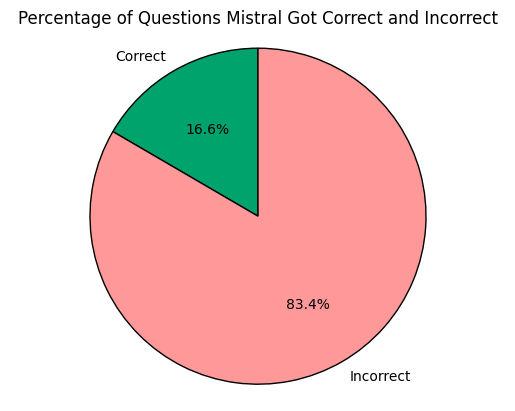

In [29]:
labels = ['Correct', 'Incorrect']
sizes = [model_all_correct[True], model_all_correct[False]]
colors = ['#00A36C', '#ff9999']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.axis('equal')
plt.title('Percentage of Questions Llemma Got Correct and Incorrect')

plt.show()

In [13]:
import pandas as pd
from datasets import load_dataset, DatasetDict, Dataset
import matplotlib.pyplot as plt
import re

In [14]:
llemma_file = "Llemma_Inference_SAT_Dataset.csv"
mistral_file = "Mistral_Inference_SAT_Dataset.csv"
llama_file = "Llama_Inference_SAT_Dataset.csv"
qwen_file = "Qwen_Inference_SAT_Dataset.csv"

def extract_numbers(s):
    normalized = re.sub(r'[^\d\s]', '', s)
    return list(map(int, re.findall(r'\d+', normalized)))
def compare_number_lists(list1, list2):
    return set(list1).issubset(set(list2))  # list1=correct solution

In [15]:
def format_llema_inference_sat_math():
    df = pd.read_csv(llemma_file, index_col=0)
    llema_test_dataset= df.merge(test_dataset_df, left_on='ID', right_on='id')

    llema_test_dataset['Actual_Solution'] = llema_test_dataset['answer'].apply(extract_numbers)
    llema_test_dataset['Run_1'] = llema_test_dataset['Run_1'].astype(str)
    llema_test_dataset['Llemma_Solution'] = llema_test_dataset['Run_1'].apply(extract_numbers)

    llema_test_dataset["llemma_is_correct"] = llema_test_dataset.apply(
        lambda row: row["Llemma_Solution"] in row["Actual_Solution"], axis=1
    )

    #llema_test_dataset = llema_test_dataset.rename(columns={"Final Solution": "llema_solution"})
    llema_test_dataset = llema_test_dataset.rename(columns={"ID": "Question Id"})
    llema_3_results = llema_test_dataset[["Question Id", "llemma_is_correct", "Llemma_Solution"]]
    return llema_3_results

def format_mistral_inference_sat_math():
    df = pd.read_csv(mistral_file)
    mistral_test_dataset= df.merge(test_dataset_df, left_on='ID', right_on='id')

    mistral_test_dataset['Actual_Solution'] = mistral_test_dataset['answer'].apply(extract_numbers)
    mistral_test_dataset['Run_1'] = mistral_test_dataset['Run_1'].astype(str)
    mistral_test_dataset['Mistral_Solution'] = mistral_test_dataset['Run_1'].apply(extract_numbers)

    mistral_test_dataset['mistral_is_correct'] = [
        compare_number_lists(a, b) for a, b in zip(mistral_test_dataset['Actual_Solution'], mistral_test_dataset['Mistral_Solution'])
    ]

    mistral_test_dataset = mistral_test_dataset.rename(columns={"ID": "Question Id"})

    mistral_results = mistral_test_dataset[["Question Id", "mistral_is_correct", "Mistral_Solution"]]
    return mistral_results

def format_llama_inference_sat_math():
    df = pd.read_csv(llama_file)
    llama_test_dataset= df.merge(test_dataset_df, left_on='ID', right_on='id')

    llama_test_dataset['Actual_Solution'] = llama_test_dataset['answer'].apply(extract_numbers)
    llama_test_dataset['Run_1'] = llama_test_dataset['Run_1'].astype(str)
    llama_test_dataset['Llama_Solution'] = llama_test_dataset['Run_1'].apply(extract_numbers)

    llama_test_dataset['llama_is_correct'] = [
        compare_number_lists(a, b) for a, b in zip(llama_test_dataset['Actual_Solution'], llama_test_dataset['Llama_Solution'])
    ]

    llama_test_dataset = llama_test_dataset.rename(columns={"ID": "Question Id"})
    llama_results = llama_test_dataset[["Question Id", "llama_is_correct", "Llama_Solution"]]
    return llama_results

def format_qwen_inference_sat_math():
    df = pd.read_csv(qwen_file)
    qwen_test_dataset= df.merge(test_dataset_df, left_on='ID', right_on='id')

    qwen_test_dataset['Actual_Solution'] = qwen_test_dataset['answer'].apply(extract_numbers)
    qwen_test_dataset['Run_1'] = qwen_test_dataset['Run_1'].astype(str)
    qwen_test_dataset['QWEN_Solution'] = qwen_test_dataset['Run_1'].apply(extract_numbers)

    qwen_test_dataset['qwen_is_correct'] = [
        compare_number_lists(a, b) for a, b in zip(qwen_test_dataset['Actual_Solution'], qwen_test_dataset['QWEN_Solution'])
    ]

    qwen_test_dataset = qwen_test_dataset.rename(columns={"id": "Question Id"})
    qwen_results = qwen_test_dataset[["Question Id", "qwen_is_correct", "QWEN_Solution"]]
    return qwen_results

In [16]:
llama3_results = format_llama_inference_sat_math()
llema_results = format_llema_inference_sat_math()
qwen_results = format_qwen_inference_sat_math()
mistral_results = format_mistral_inference_sat_math()

combined_results = ((llama3_results.merge(llema_results)).merge(qwen_results)).merge(mistral_results)
combined_results["only_llama_incorrect"] = (combined_results["llama_is_correct"] == False) & (combined_results["llemma_is_correct"] == True) & (combined_results["qwen_is_correct"] == True) & (combined_results["mistral_is_correct"]==True)
combined_results["only_llemma_incorrect"] = (combined_results["llama_is_correct"] == True) & (combined_results["llemma_is_correct"] == False) & (combined_results["qwen_is_correct"] == True) & (combined_results["mistral_is_correct"]==True)
combined_results["only_mistral_incorrect"] = (combined_results["llama_is_correct"] == True) & (combined_results["llemma_is_correct"] == True) & (combined_results["qwen_is_correct"] == True) & (combined_results["mistral_is_correct"]==False)
combined_results["only_qwen_incorrect"] = (combined_results["llama_is_correct"] == True) & (combined_results["llemma_is_correct"] == True) & (combined_results["qwen_is_correct"] == False) & (combined_results["mistral_is_correct"]==True)


In [17]:
model_llama_incorrect = combined_results["only_llama_incorrect"].value_counts()
model_llemma_incorrect = combined_results["only_llemma_incorrect"].value_counts()
model_mistal_incorrect = combined_results["only_mistral_incorrect"].value_counts()
model_qwen_incorrect = combined_results["only_qwen_incorrect"].value_counts()

model_llama_incorrect

,count
only_llama_incorrect,
False,6194


In [18]:
model_llemma_incorrect

,count
only_llemma_incorrect,
False,5551
True,643


In [19]:
model_mistal_incorrect

,count
only_mistral_incorrect,
False,6194


In [20]:
model_qwen_incorrect

,count
only_qwen_incorrect,
False,6194


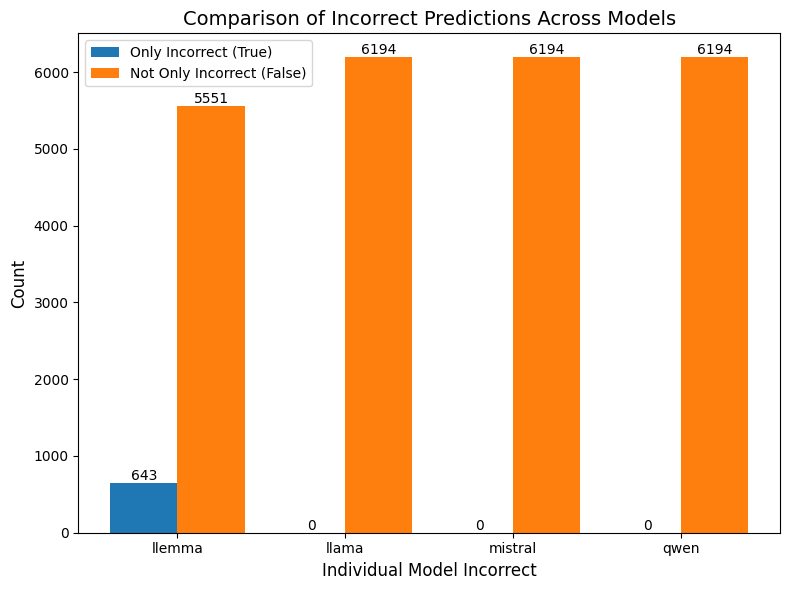

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for visualization
data = {
    "Model": ["llemma", "llama", "mistral", "qwen"],
    "Only Incorrect (True)": [643, 0, 0, 0],
    "Not Only Incorrect (False)": [5551, 6194, 6194, 6194]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.4

# Bar positions
index = range(len(df["Model"]))
bar1 = plt.bar(index, df["Only Incorrect (True)"], bar_width, label="Only Incorrect (True)")
bar2 = plt.bar([i + bar_width for i in index], df["Not Only Incorrect (False)"], bar_width, label="Not Only Incorrect (False)")

# Add counts on top of the bars
for bar in bar1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom', fontsize=10)

for bar in bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Labels and title
plt.xlabel("Individual Model Incorrect", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Comparison of Incorrect Predictions Across Models", fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], df["Model"])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [22]:
combined_results_2 = ((llama3_results.merge(llema_results)).merge(qwen_results)).merge(mistral_results)
combined_results_2 = ((llama3_results.merge(llema_results)).merge(qwen_results)).merge(mistral_results)
combined_results_2["only_llama_correct"] = (combined_results_2["llama_is_correct"] == True) & (combined_results_2["llemma_is_correct"] == False) & (combined_results_2["qwen_is_correct"] == False) & (combined_results_2["mistral_is_correct"]==False)
combined_results_2["only_llemma_correct"] = (combined_results_2["llama_is_correct"] == False) & (combined_results_2["llemma_is_correct"] == True) & (combined_results_2["qwen_is_correct"] == False) & (combined_results_2["mistral_is_correct"]==False)
combined_results_2["only_mistral_correct"] = (combined_results_2["llama_is_correct"] == False) & (combined_results_2["llemma_is_correct"] == False) & (combined_results_2["qwen_is_correct"] == False) & (combined_results_2["mistral_is_correct"]==True)
combined_results_2["only_qwen_correct"] = (combined_results_2["llama_is_correct"] == False) & (combined_results_2["llemma_is_correct"] == False) & (combined_results_2["qwen_is_correct"] == True) & (combined_results_2["mistral_is_correct"]==False)


In [23]:
model_llama_correct = combined_results_2["only_llama_correct"].value_counts()
model_llemma_correct = combined_results_2["only_llemma_correct"].value_counts()
model_mistal_correct = combined_results_2["only_mistral_correct"].value_counts()
model_qwen_correct = combined_results_2["only_qwen_correct"].value_counts()

model_llama_correct

,count
only_llama_correct,
False,4891
True,1303


In [24]:
model_llemma_correct

,count
only_llemma_correct,
False,6194


In [25]:
model_mistal_correct

,count
only_mistral_correct,
False,6090
True,104


In [26]:
model_qwen_correct

,count
only_qwen_correct,
False,5546
True,648


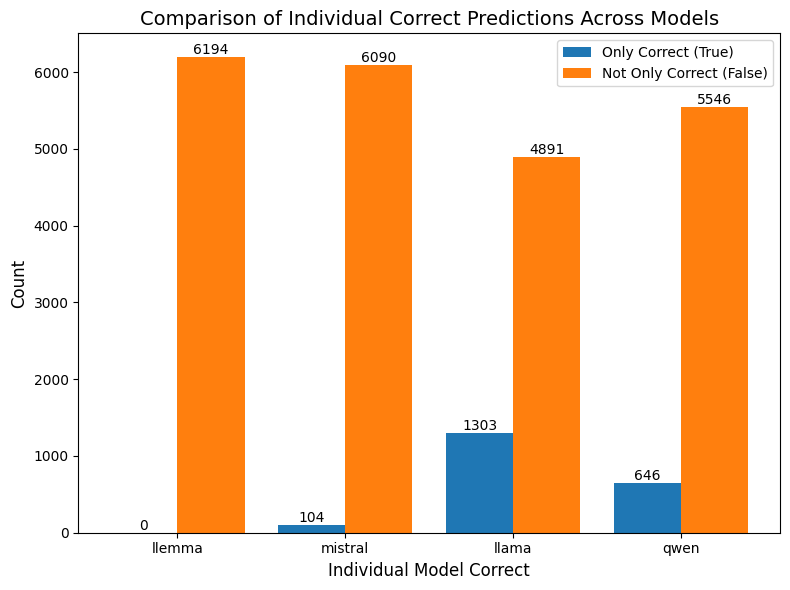

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for visualization
data = {
    "Model": ["llemma", "mistral", "llama", "qwen"],
    "Only Correct (True)": [0, 104, 1303, 646],
    "Not Only Correct (False)": [6194, 6090, 4891, 5546]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.4

# Bar positions
index = range(len(df["Model"]))
bar1 = plt.bar(index, df["Only Correct (True)"], bar_width, label="Only Correct (True)")
bar2 = plt.bar([i + bar_width for i in index], df["Not Only Correct (False)"], bar_width, label="Not Only Correct (False)")

# Add counts on top of the bars
for bar in bar1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom', fontsize=10)

for bar in bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Labels and title
plt.xlabel("Individual Model Correct", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Comparison of Individual Correct Predictions Across Models", fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], df["Model"])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
